__генератор текстовых описаний к изображениям__

Евгений Борисов esborisov@sevsu.ru

# загружаем данные

COCO2014/2017. Microsoft Common Objects in Context.   
https://www.codetd.com/en/article/12388819

In [1]:
# !wget -c http://images.cocodataset.org/annotations/annotations_trainval2014.zip
# !wget -c http://images.cocodataset.org/annotations/image_info_test2014.zip
# !wget -c http://images.cocodataset.org/zips/val2014.zip
# !wget -c http://images.cocodataset.org/zips/test2014.zip
# !wget -c http://images.cocodataset.org/zips/train2014.zi

https://pytorch.org/vision/stable/_modules/torchvision/datasets/coco.html

---

In [2]:
!ls data/mscoco2014

annotations  get.sh  test  train  train_bad_images.csv	val  _zip


In [3]:
!ls data/mscoco2014/annotations/

captions_train.json   instances_train.json	   person_keypoints_val.json
captions_val.json     instances_val.json
image_info_test.json  person_keypoints_train.json


---

## загружаем аннотации к картинкам

In [4]:
import json

with open('data/mscoco2014/annotations/captions_train.json','rt') as f: captions = json.load(f)

# список разделов    
display( captions.keys() )

dict_keys(['info', 'images', 'licenses', 'annotations'])

In [5]:
# описание датасета
display( captions['info'] )

{'description': 'COCO 2014 Dataset',
 'url': 'http://cocodataset.org',
 'version': '1.0',
 'year': 2014,
 'contributor': 'COCO Consortium',
 'date_created': '2017/09/01'}

## конвертируем таблицу картинок

In [6]:
import pandas as pd

In [7]:
images = pd.DataFrame(captions['images'])
display(len(images))
display(images.sample(3))

82783

,license,file_name,coco_url,height,width,date_captured,flickr_url,id
25576,1,COCO_train2014_000000115037.jpg,http://images.cocodataset.org/train2014/COCO_t...,498,640,2013-11-24 20:47:14,http://farm5.staticflickr.com/4027/4701005177_...,115037
35132,3,COCO_train2014_000000366643.jpg,http://images.cocodataset.org/train2014/COCO_t...,455,640,2013-11-17 17:11:03,http://farm4.staticflickr.com/3063/2389063660_...,366643
12832,3,COCO_train2014_000000567318.jpg,http://images.cocodataset.org/train2014/COCO_t...,640,640,2013-11-18 20:59:26,http://farm8.staticflickr.com/7060/6863345379_...,567318


## конвертируем таблицу аннотаций

In [8]:
annotations = pd.DataFrame(captions['annotations'])
display(len(annotations))
display(annotations.sample(3))

414113

,image_id,id,caption
72044,190157,173638,A large commercial airplane about to take off
283666,127393,543111,A snowboarder performs a trick on a box.
88489,3178,585046,A group of three giraffe standing next to each...


In [9]:
del captions # удаляем исходные данные

## собираем вместе 

In [10]:
data = (
        images.rename(columns={'id':'image_id'})
        .merge(annotations.rename(columns={'id':'annotation_id'}),on=['image_id'])
    )
display(len(data))
display(data.sample(3))

414113

,license,file_name,coco_url,height,width,date_captured,flickr_url,image_id,annotation_id,caption
62086,5,COCO_train2014_000000483288.jpg,http://images.cocodataset.org/train2014/COCO_t...,427,640,2013-11-16 04:49:28,http://farm8.staticflickr.com/7273/6972750222_...,483288,41720,An airplane carrying a space shuttle in air.
71876,3,COCO_train2014_000000140092.jpg,http://images.cocodataset.org/train2014/COCO_t...,514,640,2013-11-14 19:36:20,http://farm8.staticflickr.com/7437/8720683016_...,140092,477684,A female nurse is standing next to a man in a ...
389193,3,COCO_train2014_000000442365.jpg,http://images.cocodataset.org/train2014/COCO_t...,640,480,2013-11-24 21:38:03,http://farm1.staticflickr.com/190/508175274_ce...,442365,254713,A man holding a tray of stuffed bears.


In [11]:
del annotations
del images

In [12]:
data = data[['image_id','file_name','height', 'width','caption']]
display(len(data))
display(data.sample(3))

414113

,image_id,file_name,height,width,caption
259214,29154,COCO_train2014_000000029154.jpg,480,640,An assortment of fresh vegetables are displaye...
300876,530187,COCO_train2014_000000530187.jpg,480,640,Two beds and other furniture inside a hotel room
123350,160743,COCO_train2014_000000160743.jpg,375,500,A pair of white cats lazily lying on a compute...


In [13]:
data['file_path'] =  'data/mscoco2014/train/' + data['file_name']

## проверка и очистка данных

In [14]:
# удаляем явные дубликаты
display(len(data))
data['caption'] = data['caption'].str.lower().str.strip()
data = data.drop_duplicates(['file_name','caption']).reset_index(drop=True)
display(len(data))
display(data.sample(3))

414113

413972

,image_id,file_name,height,width,caption,file_path
381580,477409,COCO_train2014_000000477409.jpg,480,640,a man is flying a kite on a beach.,data/mscoco2014/train/COCO_train2014_000000477...
15034,130538,COCO_train2014_000000130538.jpg,500,318,a kitchen with a blender that has spilled its ...,data/mscoco2014/train/COCO_train2014_000000130...
56623,116393,COCO_train2014_000000116393.jpg,640,480,a picture of a very nice elegant bathroom.,data/mscoco2014/train/COCO_train2014_000000116...


In [15]:
data = data.merge(
        data[['image_id']]
        .groupby(['image_id']).size().to_frame()
        .rename(columns={0:'anno_count'})
        .reset_index(),
        on='image_id'
    )

display(len(data))
display(len(data.query('anno_count>1')))
display(data.sample(3))

413972

413972

,image_id,file_name,height,width,caption,file_path,anno_count
357239,579440,COCO_train2014_000000579440.jpg,360,640,a group of people looking in one direction whi...,data/mscoco2014/train/COCO_train2014_000000579...,5
5593,560412,COCO_train2014_000000560412.jpg,375,500,a laptop is sitting in the seat of a car,data/mscoco2014/train/COCO_train2014_000000560...,5
255674,177619,COCO_train2014_000000177619.jpg,500,375,a silver mp3 player laying on a place-mat on d...,data/mscoco2014/train/COCO_train2014_000000177...,5


In [16]:
# все картинки имеют более одного описания 
display( data[['anno_count']].describe().T.astype(int) )

,count,mean,std,min,25%,50%,75%,max
anno_count,413972,5,0,3,5,5,5,6


In [17]:
# примеры аннотаций
for image_id in data['image_id'].sample(3):
    display( data.query(f'image_id=={image_id}')[['image_id','caption']] )

,image_id,caption
202264,150827,red and gold cards on a plant outside a buildi...
202265,150827,a bunch of tomatoes hanging from a tree.
202266,150827,a very nice tree made of fruits and cards
202267,150827,a group of cards sitting on top of a tree that...
202268,150827,a tree filled with fruit and lots of red and g...


,image_id,caption
280344,119536,wedding cake and sandwich decoration with cand...
280345,119536,a small wedding cake on a table with candles.
280346,119536,picture of wedding cake next to burger cake
280347,119536,wedding cake displayed on neatly set serving t...
280348,119536,a three-tiered wedding cake sitting on a white...


,image_id,caption
219853,63691,a man taking a picture of a laptop screen with...
219854,63691,a man sitting at a desk using a laptop computer.
219855,63691,a person is taking a picture with their cellph...
219856,63691,a man using a cell phone and a laptop.
219857,63691,a man with a laptop holding a phone.


---

In [18]:
%%time 

from nltk.tokenize import word_tokenize as nltk_tokenize_word

# размеры аннотаций
# data['caption_str_len'] = data['caption'].str.len()
data['caption_len'] = data['caption'].apply(lambda s: len(nltk_tokenize_word(s,language='english')) )
display( data[['caption_len']].describe([.01,.05,.1,.25,.5,.75,.9,.95,.99]).T.astype(int) )

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
caption_len,413972,11,2,6,8,8,9,10,11,12,14,16,20,57


CPU times: user 21.9 s, sys: 315 ms, total: 22.2 s
Wall time: 21.8 s


In [19]:
# выкидываем очень длинные аннотаций 
display(len(data))
# data = data.query('caption_str_len<75').reset_index(drop=True)
data = data.query('8<caption_len<16').reset_index(drop=True)
display(len(data))

413972

368560

---

In [20]:
# размеры картинки 
data['image_size'] = data[['height','width']].apply(lambda s:'{}x{}'.format(*s),axis=1)

<Axes: ylabel='image_size'>

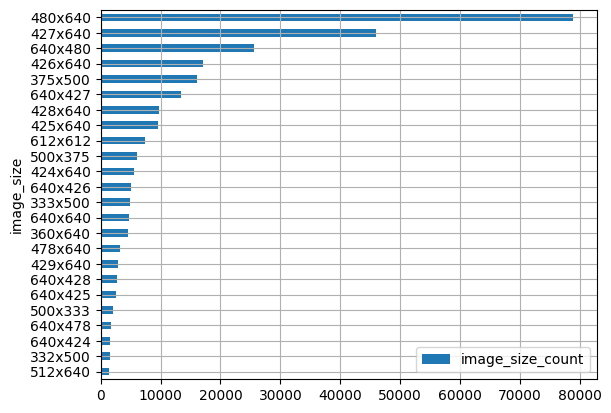

In [21]:
( 
data[['image_size']]
.groupby(['image_size']).size().to_frame()
.rename(columns={0:'image_size_count'})
# .reset_index()
.sort_values(by='image_size_count',ascending=True)
.tail(24)
.plot.barh(grid=True)    
)

---

In [22]:
display(len(data))
display(data.sample(3))

368560

,image_id,file_name,height,width,caption,file_path,anno_count,caption_len,image_size
25105,131696,COCO_train2014_000000131696.jpg,426,640,a dog is running along a sea shore.,data/mscoco2014/train/COCO_train2014_000000131...,5,9,426x640
177943,259228,COCO_train2014_000000259228.jpg,480,640,a group of smiling people are seated around a ...,data/mscoco2014/train/COCO_train2014_000000259...,5,12,480x640
44305,579260,COCO_train2014_000000579260.jpg,499,640,a female surfer riding a wave in the ocean..,data/mscoco2014/train/COCO_train2014_000000579...,5,10,499x640


# строим генератор датасета

In [23]:
from tqdm.auto import tqdm
from itertools import chain
import numpy as np

In [24]:
from nltk import __version__ as nltk_version
print('nltk version:',nltk_version)

from nltk.tokenize import sent_tokenize as nltk_sentence_split
from nltk.tokenize import word_tokenize as nltk_tokenize_word
from nltk.util import ngrams

nltk version: 3.8.1


In [25]:
# !pip install torch
import torch
from torch.utils.data import Dataset
import torch.nn.functional as F

In [26]:
# !pip install torchvision

In [27]:
from PIL import Image
import torchvision.transforms as transforms

In [28]:
# !pip install torchtext
# import torchtext
# from torchtext.data import get_tokenizer

In [29]:
class ImageAnnotationDataset(Dataset):
    
    def __init__(self, images, annotations, img_size=(480,640), vocabulary=dict() ):
        assert len(images)>1
        assert len(annotations)==len(images)

        # преобразование фотографии в torch.tensor
        self._img_T = transforms.Compose([ 
                    transforms.ToTensor(),
                    transforms.Resize(img_size),
                    transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225]),
                ])
        
        self._images = []
        self._annotations = []
                
        for n in tqdm(range(len(annotations))):
            try:
                fname = images[n]
                x = self._load_image(fname)
                a = nltk_tokenize_word(annotations[n],language='english')
                
                self._images.append(x)
                self._annotations.append(a)
                
            except Exception as err:
                print(f'{fname}: {err}')
            
        assert len(self._annotations)==len(self._images)

        # self._images = torch.cat(self._images,dim=0)
        
        if len(vocabulary)<1:
            self._vocabulary = self._build_vocabulary()
        else:
            self._vocabulary = vocabulary
            
        self._max_seq = max([len(s) for s in self._annotations])
        
                
    def _build_vocabulary(self):  
        tokens_ = ['<UNK>','<BOS>','<EOS>',] # служебные токены
        # собираем токены из текста
        tokens = sorted(set(chain(*self._annotations)))
        # добавляем в словарь служебные токены 
        assert len( set(tokens_) & set(tokens) )==0
        return { w:n for n,w in enumerate(tokens_+tokens) } # строим словарь
                    
    @property
    def annotations(self): return self._annotations

    @property
    def vocabulary(self): return self._vocabulary

    # размер датасета
    def __len__(self): return len(self._annotations)
    
    def __getitem__(self, idx): # выдать элемент датасета номер idx
        return ( self._images[idx], self._get_sequence(idx), )
    
    def _load_image(self,fname):
        return  self._img_T( Image.open(fname) )
    
    def _get_sequence(self,idx):
        return torch.tensor(
                self._encode_sequence(self._pad_sequence( self._annotations[idx] ))
                 ,dtype=torch.long
            )
    
    def _pad_sequence(self,s):
        pad = ['<EOS>']*(self._max_seq-(len(s)))
        return s+['<EOS>']+pad
        
    def _encode_sequence(self,s):
        assert len(s)==(self._max_seq+1), f'{len(s)},{s}'
        
        return [ # заменить в последовательности все токены на их номера в словаре
            self._vocabulary[w] if (w in self._vocabulary) else self._vocabulary['<UNK>']
            for w in s 
        ]

In [30]:
data_train = data.sample(1024)

In [31]:
%%time 

ds_train = ImageAnnotationDataset( data_train['file_path'].to_list(), data_train['caption'].to_list() )
display( len(ds_train) )
display( len(ds_train.vocabulary) )

  0%|          | 0/1024 [00:00<?, ?it/s]

1024

1626

CPU times: user 2min 1s, sys: 4.97 s, total: 2min 6s
Wall time: 34.7 s


In [32]:
from torch.utils.data import DataLoader

#x,t = ds[:4]
#display((x.shape,t.shape))

for x, t in DataLoader( ds_train, batch_size=4, shuffle=True): break
display((x.shape,t.shape))

(torch.Size([4, 3, 480, 640]), torch.Size([4, 16]))

In [33]:
data_valid = data[~data.index.isin(data_train.index)].sample(128)
ds_valid = ImageAnnotationDataset( 
    data_valid['file_path'].to_list(), 
    data_valid['caption'].to_list(),
    vocabulary=ds_train.vocabulary,
)
display( len(ds_valid) )

  0%|          | 0/128 [00:00<?, ?it/s]

data/mscoco2014/train/COCO_train2014_000000384907.jpg: output with shape [1, 480, 640] doesn't match the broadcast shape [3, 480, 640]


127

# Модель

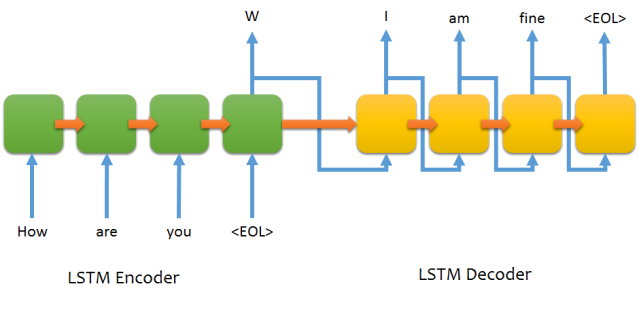

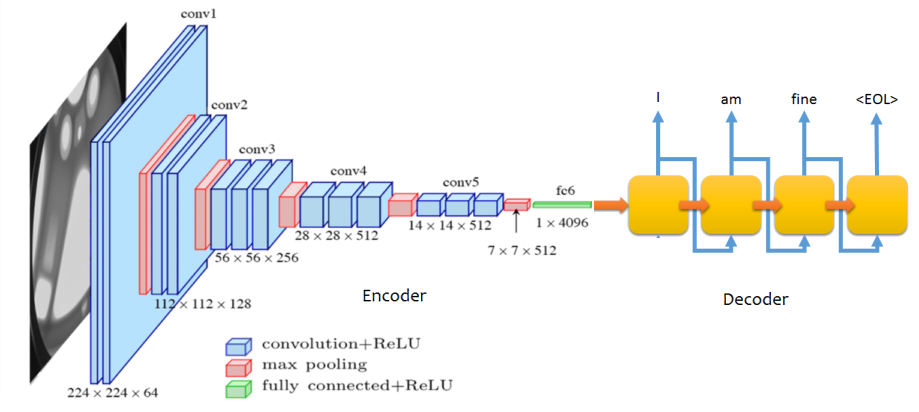

## энкодер

In [34]:
import torch.nn as nn
import torch.nn.functional as F

In [35]:
# подгружаем предобученный классификатор картинок
from torchvision.models import vgg11
model_encoder = vgg11(weights='IMAGENET1K_V1')

In [36]:
display(model_encoder)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

In [37]:
# фиксируем веса модели, дообучать их не будем
for param in model_encoder.parameters():
    param.requires_grad = False

In [38]:
# размер выхода фичерэкстрактора
in_features = model_encoder.classifier[0].in_features
display(in_features)

25088

In [39]:
hidden_dim = 256 # размер выхода энкодера и состояния декодера

# заменяем предобученный выходной модуль классификатора VVG
#  на простой адаптер, понижение размерности
model_encoder.classifier = nn.Sequential(
        nn.Linear(in_features, hidden_dim),
    )    

In [40]:
# for x, t in DataLoader( ds, batch_size=4, shuffle=True): break
# display((x.shape,t.shape))

# o = model_encoder(x)
# display(o.shape)

## декодер

In [41]:
class Decoder(nn.Module):
    
    def __init__(self, vocabulary, hidden_dim):
        super(Decoder, self).__init__()
        self._vocabulary = vocabulary
        
        self._emb = nn.Embedding(num_embeddings=len(vocabulary),embedding_dim=hidden_dim)
        self._gru = nn.GRU( 
                input_size=hidden_dim, 
                hidden_size=hidden_dim, 
                num_layers=1, 
                batch_first=True,
                # dropout=0.4,
            )
        self._lin = nn.Linear(in_features=hidden_dim, out_features=len(vocabulary),bias=True,)
        
        # первый вход, код токена Begin Of Sequence
        self._token_bos = self._vocabulary['<BOS>']

    # генерируем выход модели
    def _forward_step(self,x,h):
        o = self._emb(x)
        o,h = self._gru(o,h)
        o = self._lin(o)
        o = F.log_softmax(o,dim=-1)
        return o,h
    
    # рабочий режим - по авторегрессионной схеме генерируем последовательность длиной seq_len
    def forward(self, encoder_hidden, seq_len=10): 
        device = next(self._lin.parameters()).device # устройство модели
        batch_size = encoder_hidden.size(1) # размер входного батча 
        codes = [] # выходная последовательность
        h = encoder_hidden # состояние энкодера передаём декодеру
        # начальный вход рекуррентного слоя
        #o = torch.zeros(batch_size, 1, dtype=torch.long, device=device)
        o = torch.ones(batch_size, 1, dtype=torch.long, device=device)*self._token_bos
        for i in range(seq_len):
            o, h  = self._forward_step(o,h) # авторегрессионная схема - выход подаём на вход
            o = torch.argmax(o,dim=-1, keepdim=False) # определяем номер токена-победителя
            codes.append(o.cpu().numpy()) # сохраняем результат
        return np.hstack(codes)
                
    # учебный режим - генерируем последовательность длинной как у target
    # по схеме teacher forcing, на каждой итерации заменяем вход на значение из target
    def forward_train(self, encoder_hidden, target):
        device = next(self._lin.parameters()).device # устройство модели
        batch_size = encoder_hidden.size(1) # размер входного батча 
        seq_len = target.size(-1) # длина учебной последовательности
        
        outputs = []  # выходы модели 

        # начальный вход рекуррентного слоя
        t = torch.ones(batch_size, 1, dtype=torch.long, device=device)*self._token_bos
        h = encoder_hidden  # состояние энкодера передаём декодеру
        
        for i in range(seq_len):
            o, h = self._forward_step(t,h)
            outputs.append(o)
            # teacher forcing: заменяем выход модели на предыдущей итерации на target
            t = target[:,[i]].to(device)
        return torch.cat(outputs, dim=1)
    

In [42]:
# model_decoder = Decoder( vocabulary=ds.vocabulary, hidden_dim=hidden_dim,)

# x,t = ds[:4]
# display((x.shape,t.shape))

# h = model_encoder(x)
# display(h.shape)
# h = h.unsqueeze(0)
# # o = model_decoder.forward(h)
# o = model_decoder.forward_train(h,t)
# display(o.shape)

---

In [43]:
# проверяем GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
display( device )
display( torch.cuda.get_device_name() )

device(type='cuda', index=0)

'Tesla P40'

In [44]:
model_decoder = Decoder( vocabulary=ds_train.vocabulary, hidden_dim=hidden_dim,)

In [45]:
model_encoder = model_encoder.to(device)
model_decoder = model_decoder.to(device)

In [46]:
# x,t = ds[:4]
# display((x.shape,t.shape))

# h = model_encoder(x.to(device))
# display(h.shape)
# h = h.unsqueeze(0)
# o = model_decoder.forward(h)
# # o = model_decoder.forward_train(h,t.to(device))
# display(o.shape)

---

In [47]:
# for x, t in DataLoader( ds, batch_size=4, shuffle=True): break
# display((x.shape,t.shape))

# обучаем 

In [48]:
display( len(ds_train) )

1024

In [49]:
from torch import optim

learning_rate = 1e-3
encoder_optimizer = optim.Adam( model_encoder.parameters(), lr=learning_rate )
decoder_optimizer = optim.Adam( model_decoder.parameters(), lr=learning_rate )

criterion = nn.NLLLoss()

In [50]:
# история значений ф-ции потери
loss_train_history = [] 
loss_valid_history = [] 

In [51]:
from torch.utils.data import DataLoader

In [54]:
%%time

n_epoch = 32 # количество эпох обучения
# n_epoch = 64 # количество эпох обучения
batch_size = 64

for i in tqdm(range(n_epoch)): 
    loss_batch = []
    
    # получаем батч учебных примеров
    for x, target in DataLoader( ds_train, batch_size=batch_size, shuffle=True): 
        encoder_optimizer.zero_grad()
        decoder_optimizer.zero_grad()

        encoder_hidden = model_encoder( x.to(device) )
        decoder_outputs = model_decoder.forward_train( encoder_hidden.unsqueeze(0), target )
        
        loss = criterion(
            decoder_outputs.view(-1, decoder_outputs.size(-1)),
            target.to(device).view(-1)
        )
        loss_batch.append(loss.item()) # дополняем историю изменения значений ф-ции потери на батче
        loss.backward()

        encoder_optimizer.step()
        decoder_optimizer.step()
        
    
    loss_train_history.append( np.mean(loss_batch) ) # дополняем общую историю изменения значений ф-ции потери
    
    with torch.set_grad_enabled(False): # генерируем следующий токе   
        for x, t in DataLoader( ds_valid, batch_size=batch_size, shuffle=False):
            h = model_encoder( x.to(device) )
            o = model_decoder.forward_train( h.unsqueeze(0),t)
            loss = criterion( o.view(-1,o.size(-1)), t.to(device).view(-1) )
            loss_batch.append(loss.item()) 
        
    loss_valid_history.append( np.mean(loss_batch) ) # дополняем общую историю изменения значений ф-ции потери

  0%|          | 0/32 [00:00<?, ?it/s]

CPU times: user 8min 3s, sys: 1min 36s, total: 9min 40s
Wall time: 6min 35s


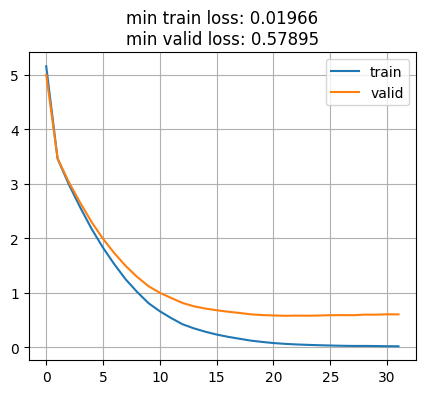

In [55]:
from matplotlib import pyplot as plt

fig,ax = plt.subplots(figsize=(5,4))
ax.plot(loss_train_history,label='train')
ax.plot(loss_valid_history,label='valid')
ax.set_title(f'min train loss: {min(loss_train_history):.5f}\nmin valid loss: {min(loss_valid_history):.5f}')
ax.grid()
ax.legend()

# тестируем

In [56]:
class LangModelImg2Seq: # генератор описаний к картинкам 
    
    def __init__(self,encoder,decoder,vocabulary,img_size=(480,640) ):
        self._encoder = encoder 
        self._decoder = decoder 
        self._vocabulary = vocabulary # словарь языковой модели
        self._vocabulary_inv = { v:k for k,v in self._vocabulary.items() }
        
        self._img_T = transforms.Compose([ 
                transforms.ToTensor(),
                transforms.Resize(img_size),
                transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225]),
            ])
    
    def predict(self,img,seq_len=10):
        codes = self._predict( self._convert_img(img), seq_len) # генерируем коды токенов
        return self._strip_eos( self._decode(np.hstack(codes)) ) # конвертируем коды токенов в строку

    def _convert_img(self,img):
        return self._img_T(img).unsqueeze(0)
    
    def _predict(self,x,seq_len):
        device = next(self._encoder.parameters()).device 
        with torch.set_grad_enabled(False): # генерируем следующий токен
            h = self._encoder(x.to(device))
            codes = self._decoder.forward(h.unsqueeze(0),seq_len)
        return codes
    
    def _encode(self,s): # кодируем строку
        s = nltk_tokenize_word(s,language='russian')
        s = [ self._vocabulary[w] for w in s if (w in self._vocabulary) ]
        return torch.tensor([s], dtype=torch.long )
    
    def _decode(self,s): # конвертируем коды токенов в строку
        return ' '.join([ 
            self._vocabulary_inv[c] 
            for c in s if (c in self._vocabulary_inv) 
        ])
    
    @staticmethod
    def _strip_eos(s, eos = '<EOS>'):
        n = s.find(eos)
        return s if n<0 else s[:n+len(eos)]

In [57]:
generator = LangModelImg2Seq(model_encoder,model_decoder,ds_train.vocabulary,img_size=(480,640) )

In [58]:
data_test = data[ ~data.index.isin( set(data_train.index)|set(data_valid.index) )].sample(128)

ds_test = ImageAnnotationDataset( 
        data_test['file_path'].to_list(), 
        data_test['caption'].to_list(),
        vocabulary=ds_train.vocabulary,
    )
display( len(ds_test) )
# display( len(ds_test.vocabulary) )

  0%|          | 0/128 [00:00<?, ?it/s]

128

In [59]:
# значение потери на тесте
with torch.set_grad_enabled(False): # генерируем следующий токе   
    for x, t in DataLoader( ds_test, batch_size=batch_size, shuffle=False):
        h = model_encoder( x.to(device) )
        o = model_decoder.forward_train( h.unsqueeze(0),t)
        loss = criterion( o.view(-1,o.size(-1)), t.to(device).view(-1) )
        loss_batch.append(loss.item()) 
        
display( np.mean(loss_batch) )

1.0687088459730147

---

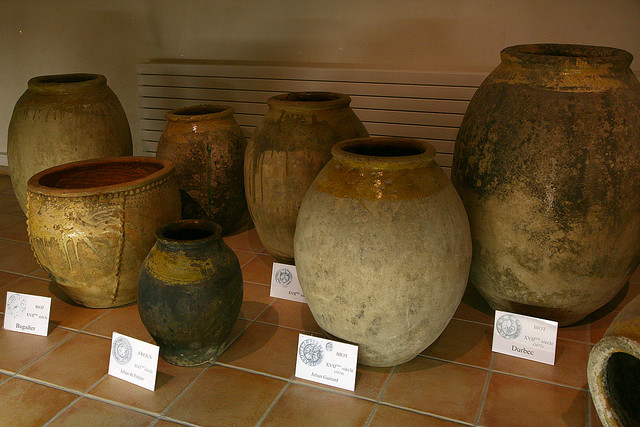

'a restroom of a plate of banana sitting next to a beam . <EOS>'

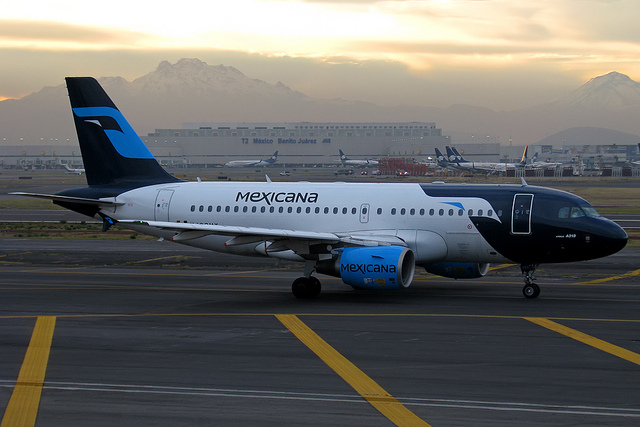

'a large passenger jet touches on top of a runway with airport . <EOS>'

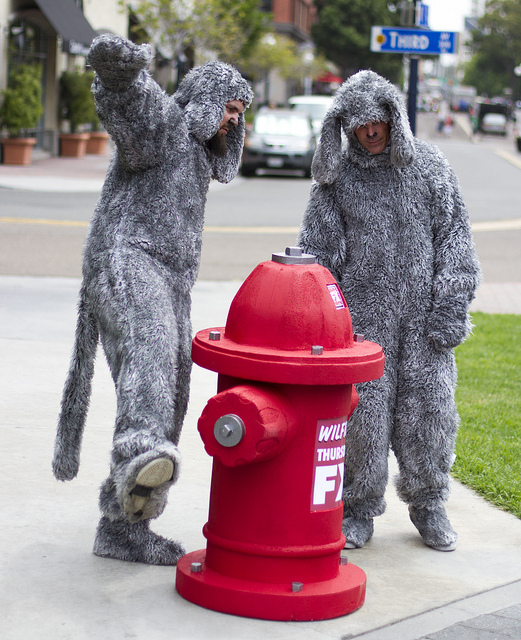

'a couple of animal sitting on a skateboard . <EOS>'

In [60]:
# примеры описаний
for fname in data_test.sample(3)['file_path']:
    im = Image.open(fname)
    display(im)
    text = generator.predict(im,seq_len=35) 
    display(text)